In [2]:
from pyedflib import highlevel
import numpy as np 
import matplotlib.pyplot as plt
file_path = 'chb12_29.edf'

In [4]:

# Read signals, signal headers, and file header in a single call
signals, signal_headers, header = highlevel.read_edf(file_path)


In [50]:
# signal_headers

Signals shape: (29, 927744)
Signal labels: dict_keys(['technician', 'recording_additional', 'patientname', 'patient_additional', 'patientcode', 'equipment', 'admincode', 'sex', 'startdate', 'birthdate', 'gender', 'annotations'])
Sample frequency of first channel: 256.0 Hz
Patient Name: 


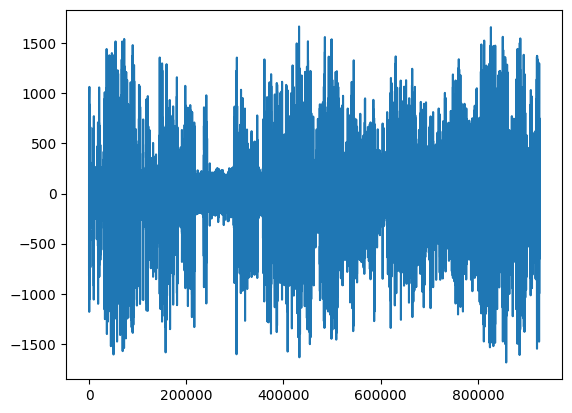

In [57]:

print(f"Signals shape: {signals.shape}")
print(f"Signal labels: {header.keys()}") # Corrected to access labels from header dict
print(f"Sample frequency of first channel: {signal_headers[0]['sample_frequency']} Hz")
print(f"Patient Name: {header['patientname']}")

# You can then plot the signals using a library like matplotlib (optional)
# import matplotlib.pyplot as plt
plt.plot(signals[0])
plt.show()


In [19]:
import scipy.io

# Load the .mat file into a dictionary
mat_contents = scipy.io.loadmat('chb12_32_data.mat')

# Print the keys to see the variable names inside the file
print(mat_contents.keys())

dict_keys(['__header__', '__version__', '__globals__', 'data'])


In [61]:
# --- Parameters ---
fs = 256.0            # Sampling frequency (Hz)
N = len(signals[0])       # Number of samples
t = np.arange(N) / fs

# --- Example signal (replace with your own) ---
# Sum of two sinusoids at 10 Hz and 40 Hz
signal = signals[1]

# --- FFT ---
X = np.fft.fft(signal)
freqs = np.fft.fftfreq(N, d=1/fs)

# Use only the positive frequencies
positive_freqs = freqs[:N // 2]
magnitude = np.abs(X[:N // 2]) / N

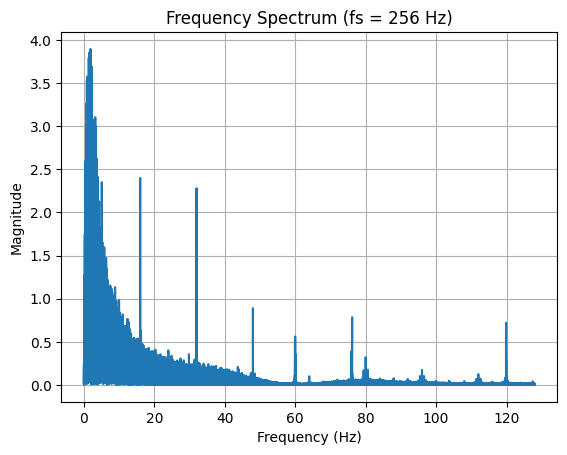

In [62]:
# --- Plot ---
plt.figure()
plt.plot(positive_freqs, magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum (fs = 256 Hz)")
plt.grid(True)
plt.show()

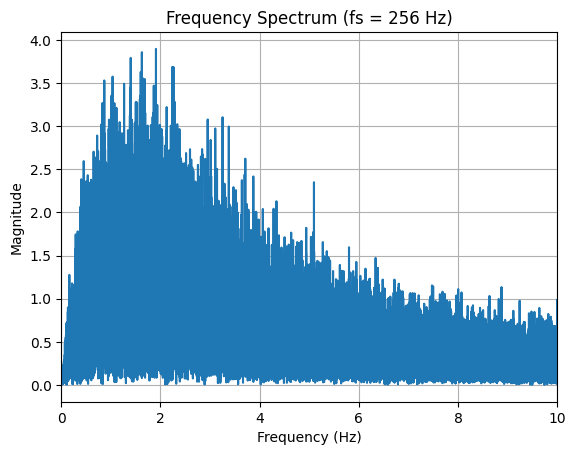

In [63]:
# --- Plot ---
plt.figure()
plt.plot(positive_freqs, magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum (fs = 256 Hz)")
plt.grid(True)
plt.xlim(0, 10)

plt.show()

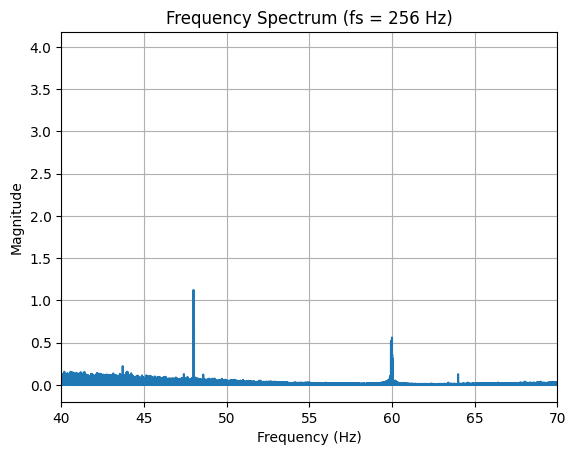

In [47]:
# --- Plot ---
plt.figure()
plt.plot(positive_freqs, magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum (fs = 256 Hz)")
plt.grid(True)
plt.xlim(40, 70)

plt.show()

In [41]:
# --- Plot ---
plt.figure()
plt.plot(positive_freqs, magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum (fs = 256 Hz)")
plt.grid(True)
plt.xlim(20, 0)

plt.show()

array([ 0.00000000e+00,  1.07788355e-06,  2.15576711e-06, ...,
       -3.23365066e-06, -2.15576711e-06, -1.07788355e-06], shape=(927744,))

# 